In [1]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing items file
items = pd.read_csv('items.csv')

# Importing users file
users = pd.read_csv('users.csv')

# Importing ratings file
ratings = pd.read_csv('ratings.csv')

In [3]:
# Printing the shape of the items dataframe
print(items.shape)
# It shows that there are 1682 rows of different movies, described by 23 columns

# Prints the first 5 rows of the dataframe
items.head()

(1682, 24)


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Printing the shape of the users dataframe
print(users.shape)
# It shows that there are 943 rows of unique users, described by 4 columns

# Prints the first 5 rows of the users dataframe
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# Printing the shape of the ratings dataframe
print(ratings.shape)
# It shows that there are 100000 rows of unique ratings, described by 3 columns. The ratings are all made by the 943 users.

# Prints the first 5 rows of the ratings dataframe
ratings.head()
# Ratings are from 1 to 5. Timestamps are the time when the user left the rating. They are unix timestamps, which are expressed
# in seconds after 1970-01-01 00:00:00 UTC

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
# items.describe() is not useful in this case, doesn't provide any useful information
# items.describe()

In [7]:
# Describes the numerical values in the users dataframe, since there is only 1 numerical value, namely age, it is the
# only one that is displayed
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
# We can see that the lowest rating is 1 and the highest is 5, with an average of ~3.5
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
# Merge items (movies) dataframe with ratings dataframe on common column movie_id
movie_ratings = pd.merge(items, ratings, on='movie_id')
movie_ratings.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,3,883601324


In [10]:
# Create number of ratings column per movie in ratings dataset
ratings_average = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
ratings_average.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


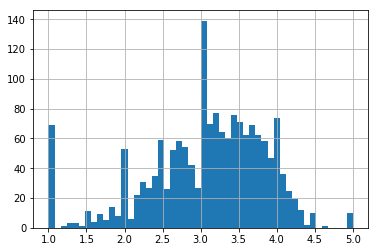

In [11]:
# Plot average rating in a histogram
ratings_average['rating'].hist(bins=50)  

In [12]:
# Create a number of ratings column to see how many ratings each movie has
ratings_average['number_of_ratings'] = movie_ratings.groupby('title')['rating'].count()

In [13]:
# Dataframe after new column
ratings_average.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [14]:
# Display movies with most ratings
ratings_average.sort_values('number_of_ratings', ascending=False).head(5)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


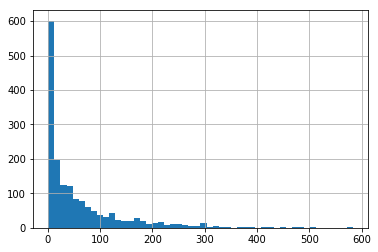

In [15]:
# Plot a histogram of the number of ratings to roughly see the distribution of the count of ratings 
ratings_average['number_of_ratings'].hist(bins=50)
# It can be seen that most movies have few ratings

In [16]:
# Is there a correlation between the number of ratings and rating itself?
ratings_average.corr()
# There seems to be quite a big correlation between the 2 variables - 43%

,rating,number_of_ratings
rating,1.000000,0.430998
number_of_ratings,0.430998,1.000000


/home/vanko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/vanko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


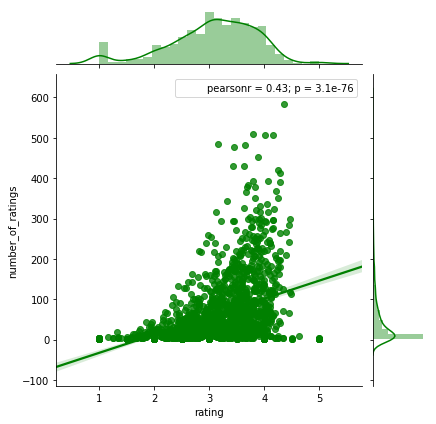

In [17]:
# See the distribution of number of ratings and average ratings
sns.jointplot(x='rating', y='number_of_ratings', data=ratings_average, kind="reg", color="g")  

# Using the correlation between the ratings of movies as a similarity metric

In [18]:
# Create a pivot table to display every rating (in table) of each user (vertical) for each movie (horizontal)
user_movie_rating = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')
user_movie_rating.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [19]:
# Select Toy Story movie as an example (displays every rating by each user for Toy Story)
toy_story_ratings = user_movie_rating['Toy Story (1995)']
toy_story_ratings.head()

user_id
1    5.0
2    4.0
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [20]:
# Find the correlation between Toy Story and every other movie in the dataset
movies_like_toy_story = user_movie_rating.corrwith(toy_story_ratings)
# Create a dataframe out of the correlations
corr_toy_story = pd.DataFrame(movies_like_toy_story, columns=['correlation'])
# Join ratings_average dataframe to see how many ratings each correlated movie has
corr_toy_story = corr_toy_story.join(ratings_average['number_of_ratings'])  
# Drop all rows with NaN values
corr_toy_story.dropna(inplace=True)  
corr_toy_story.head()  

/home/vanko/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/vanko/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,correlation,number_of_ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [21]:
# Display 10 most correlated movies
corr_toy_story.sort_values('correlation', ascending=False).head(10)
# It can be seen that all movies that have 100% correlation have a very few number of ratings, from which we cannot
# deduce similarity

,correlation,number_of_ratings
title,,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5
Reckless (1995),1.0,8
Ladybird Ladybird (1994),1.0,4
Infinity (1996),1.0,6
Albino Alligator (1996),1.0,6
Toy Story (1995),1.0,452
Guantanamera (1994),1.0,4
Late Bloomers (1996),1.0,5
Across the Sea of Time (1995),1.0,4


In [22]:
# Therefore we need to put a condition on a minimum number of ratings
corr_toy_story[corr_toy_story['number_of_ratings']>50].sort_values('correlation', ascending=False).head()  

,correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,452
Raise the Red Lantern (1991),0.641535,58
Flubber (1997),0.558389,53
"Jackal, The (1997)",0.557876,87
"Craft, The (1996)",0.549100,104
